In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('50_Startups.csv')

In [44]:
df.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04


In [45]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [47]:
# Divide the data into dependent & independent
np.set_printoptions(suppress=True, precision=2)
x = df.iloc[:, 0].values
y = df.iloc[:, -1].values

In [48]:
x

array([165349.3 , 162597.8 , 153441.61, 144372.51, 142107.44, 131877.  ,
       134615.56, 130298.23, 120542.62, 123334.98, 101913.18, 100672.06,
        93863.85,  91992.49, 119943.34, 114523.71,  78013.21,  94657.26,
        91749.26,  86419.8 ,  76253.96,  78389.57,  73994.66,  67532.63,
        77044.11,  64664.81,  75328.97,  72107.7 ,  66051.62,  65605.58,
        61994.58,  61136.48,  63408.96,  55494.05,  46426.17,  46014.12,
        28663.86,  44070.05,  20229.69,  38558.61,  28754.43,  27893.02,
        23641.03,  15505.83,  22177.84,   1000.33,   1315.56,      0.1 ,
          542.15,      0.1 ])

In [49]:
y

array([192261.93, 191792.16, 191050.49, 182902.09, 166188.04, 156991.22,
       156122.61, 155752.7 , 152211.87, 149760.06, 146122.05, 144259.5 ,
       141585.62, 134307.45, 132602.75, 129917.14, 126993.03, 125370.47,
       124267.  , 122776.96, 118474.13, 111313.12, 110352.35, 108734.09,
       108552.14, 107404.44, 105733.64, 105008.41, 103282.48, 101004.74,
        99937.69,  97483.66,  97427.94,  96779.02,  96712.9 ,  96479.61,
        90708.29,  89949.24,  81229.16,  81005.86,  78240.01,  77798.93,
        71498.59,  69759.08,  65200.43,  64926.18,  49490.85,  42559.83,
        35673.51,  14681.5 ])

In [50]:
# Feature Encoding
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# column_transformer = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')

In [51]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [53]:
len(x_train)

40

In [54]:
len(x_test)

10

In [55]:
x_test

array([ 86419.8 , 100672.06, 114523.71,  77044.11,      0.1 , 134615.56,
        78013.21,  66051.62, 162597.8 ,      0.1 ])

In [56]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [57]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

In [58]:
x_test

array([[ 0.33],
       [ 0.66],
       [ 0.97],
       [ 0.12],
       [-1.62],
       [ 1.43],
       [ 0.14],
       [-0.13],
       [ 2.06],
       [-1.62]])

In [59]:
# Create Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [60]:
# Prediction
y_prediction = regressor.predict(x_test)

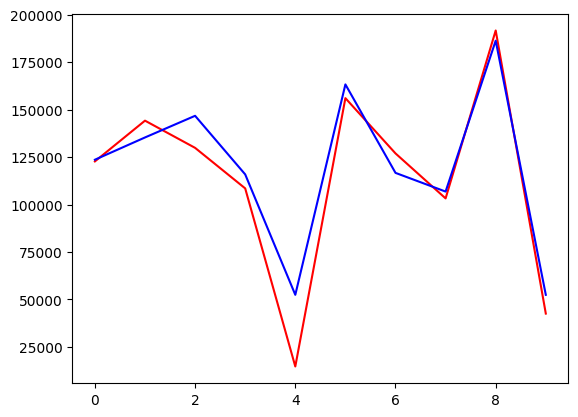

In [61]:
# Plotting of y_test and y_prediction
plt.plot(y_test, color='red', label='test')
plt.plot(y_prediction, color='blue', label='prediction')

In [63]:
# Out of the box prediction
data = [[80000]]
new_df = pd.DataFrame(data)

In [64]:
new_df = standard_scaler.transform(new_df)

In [65]:
new_df

array([[0.19]])

In [66]:
single = regressor.predict(new_df)

In [67]:
print(single)

[118369.2]
